# Machine Learning for Finance in Python
reference:
https://learn.datacamp.com/courses/machine-learning-for-finance-in-python


# 1- Preparing data and a linear model
EDA n Lin Mod

            Adj_Close  Adj_Volume
Date                             
1994-04-04       72.0         0.0
1994-04-05      108.0         0.0
1994-04-06      108.0         0.0
1994-04-07      108.0         0.0
1994-04-08      108.0         0.0
            Adj_Close  Adj_Volume
Date                             
1993-01-29  28.223927   1003200.0
1993-02-01  28.424666    480500.0
1993-02-02  28.484856    201300.0
1993-02-03  28.785997    529400.0
1993-02-04  28.906440    531500.0


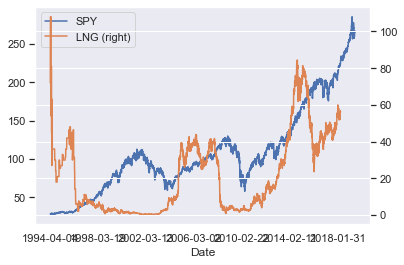

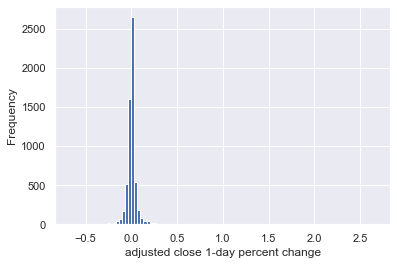

In [65]:
stocks = ['LNG','SPY','SMLV']

import pandas as pd
lng_df = pd.read_csv('lng.csv', index_col=0, header=0)
spy_df = pd.read_csv('spy.csv', index_col=0, header=0)
smlv_df = pd.read_csv('smlv.csv', index_col=0, header=0)



print(lng_df.head())  # examine the DataFrames
print(spy_df.head())  # examine the DataFrames

# Plot the  columns for SPY and LNG
import matplotlib.pyplot as plt
spy_df['Adj_Close'].plot(label='SPY', legend=True)
lng_df['Adj_Close'].plot(label='LNG', legend=True, secondary_y=True)
plt.show()  # show the plot
plt.clf()  # clear the plot space

# Histogram of the daily price change percent of Adj_Close for LNG
lng_df['Adj_Close'].pct_change(1).plot.hist(bins=100)
plt.xlabel('adjusted close 1-day percent change')
plt.show()

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.034733
5d_close_future_pct     -0.034733             1.000000


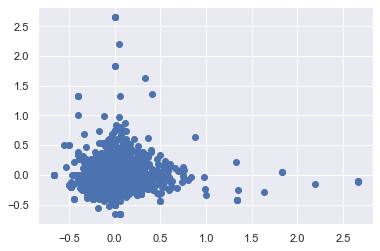

In [66]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
lng_df['5d_future_close'] = lng_df['Adj_Close'].shift(-5)
lng_df['5d_close_future_pct'] = lng_df['5d_future_close'].pct_change(5)
lng_df['5d_close_pct'] = lng_df['Adj_Close'].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = lng_df[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(lng_df['5d_close_pct'], lng_df['5d_close_future_pct'])
plt.show()

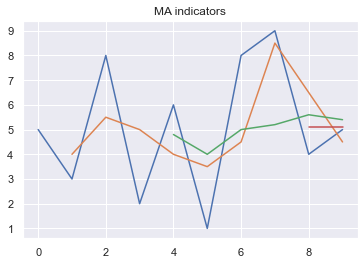

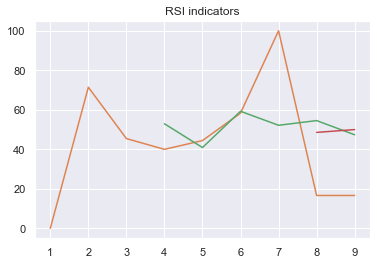

In [67]:
def talib_SMA(arr, timeperiod=2): # https://stackoverflow.com/questions/50482884/module-pandas-has-no-attribute-rolling-mean
    import pandas as pd
    return(pd.Series(arr).rolling(timeperiod).mean().values)

def talib_RSI(arr, timeperiod=2): # https://stackoverflow.com/questions/20526414/relative-strength-index-in-python-pandas
    n=timeperiod
    import pandas as pd
    price = pd.DataFrame(arr,columns=['Close'])
    delta = price['Close'].diff()
    dUp, dDown = delta.copy(), delta.copy()
    dUp[dUp < 0] = 0
    dDown[dDown > 0] = 0
    dUp=dUp.fillna(0)
    dDown=dDown.fillna(0)
    RolUp = dUp.rolling(n).mean()
    RolDown = dDown.rolling(n).mean().abs()
    RS = RolUp / RolDown
    rsi= 100.0 - (100.0 / (1.0 + RS))
    return rsi.values



data=[5,3,8,2,6,1,8,9,4,5]
import matplotlib.pyplot as plt
plt.plot(data)
plt.plot(talib_SMA(data, timeperiod=2))
plt.plot(talib_SMA(data, timeperiod=5))
plt.plot(talib_SMA(data, timeperiod=9))
plt.title('MA indicators')
plt.show()

data=[5,3,8,2,6,1,8,9,4,5]
import matplotlib.pyplot as plt
plt.plot([])
plt.plot(talib_RSI(data, timeperiod=2))
plt.plot(talib_RSI(data, timeperiod=5))
plt.plot(talib_RSI(data, timeperiod=9))
plt.title('RSI indicators')
plt.show()

In [68]:
feature_names = ['5d_close_pct']  # a list of the feature names for later

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14,30,50,200]:

    # Create the moving average indicator and divide by Adj_Close
    lng_df['ma' + str(n)] = talib_SMA(lng_df['Adj_Close'].values,
                              timeperiod=n) / lng_df['Adj_Close']
    # Create the RSI indicator
    lng_df['rsi' + str(n)] = talib_RSI(lng_df['Adj_Close'].values, timeperiod=n)
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

print(feature_names)

['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200']


<AxesSubplot:title={'center':'RSI'}, xlabel='Date'>

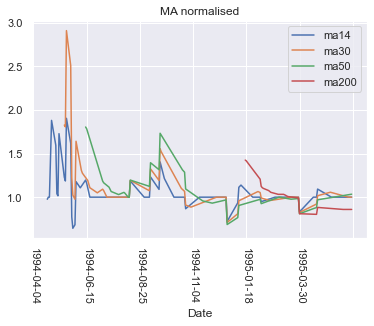

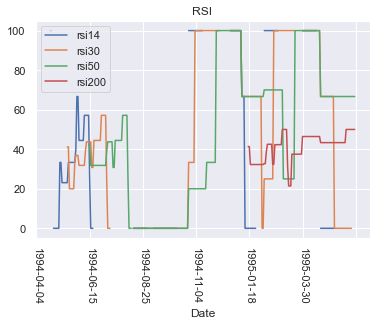

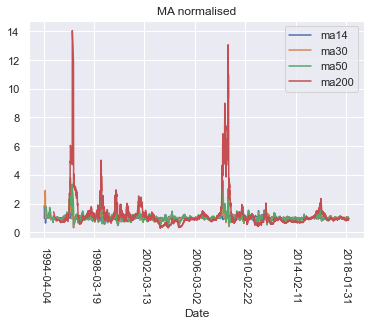

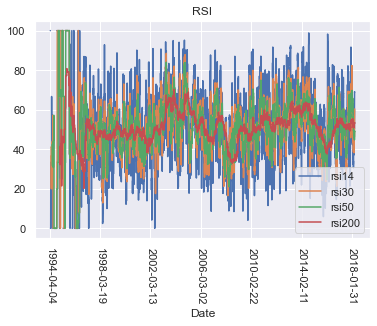

In [69]:
tmp=lng_df[:300]
tmp[['ma14', 'ma30', 'ma50', 'ma200']].plot(title='MA normalised', rot=270)
tmp[['rsi14', 'rsi30', 'rsi50', 'rsi200']].plot(title='RSI', rot=270)

lng_df[['ma14', 'ma30', 'ma50', 'ma200']].plot(title='MA normalised', rot=270)
lng_df[['rsi14', 'rsi30', 'rsi50', 'rsi200']].plot(title='RSI', rot=270)

In [70]:
# Drop all na values
lng_df = lng_df.dropna()

# Create features and targets
# use feature_names for features; '5d_close_future_pct' for targets
features = lng_df[feature_names]
targets = lng_df['5d_close_future_pct']

# Create DataFrame from target column and feature columns
feature_and_target_cols = ['5d_close_future_pct'] + feature_names
feat_targ_df = lng_df[feature_and_target_cols]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                     5d_close_future_pct  5d_close_pct      ma14     rsi14  \
5d_close_future_pct             1.000000     -0.002807  0.005445 -0.033508   
5d_close_pct                   -0.002807      1.000000 -0.719780  0.436742   
ma14                            0.005445     -0.719780  1.000000 -0.641026   
rsi14                          -0.033508      0.436742 -0.641026  1.000000   
ma30                            0.039552     -0.530102  0.866519 -0.682013   
rsi30                          -0.047870      0.300005 -0.511477  0.714212   
ma50                            0.058466     -0.392875  0.727129 -0.585753   
rsi50                          -0.033490      0.237534 -0.438511  0.584683   
ma200                           0.143039     -0.138090  0.440208 -0.335670   
rsi200                         -0.013556      0.085334 -0.234319  0.327906   

                         ma30     rsi30      ma50     rsi50     ma200  \
5d_close_future_pct  0.039552 -0.047870  0.058466 -0.033490  0.14303

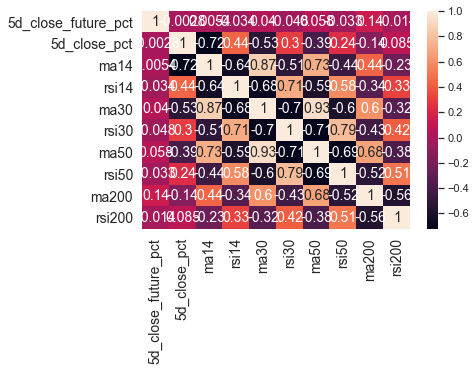

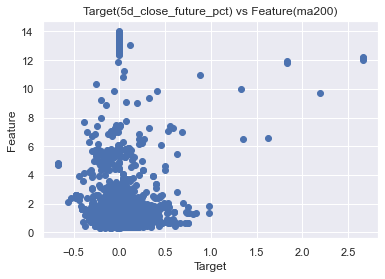

In [71]:
# Check the correlations
# Before we fit our first machine learning model, let's look at the correlations between features and targets. Ideally we want large (near 1 or -1) correlations between features and targets. Examining correlations can help us tweak features to maximize correlation (for example, altering the timeperiod argument in the talib functions). It can also help us remove features that aren't correlated to the target.

# To easily plot a correlation matrix, we can use seaborn's heatmap() function. This takes a correlation matrix as the first argument, and has many other options. Check out the annot option -- this will help us turn on annotations.

import seaborn as sns
sns.set()
# Plot heatmap of correlation matrix
sns.heatmap(corr, annot=True, annot_kws = {"size": 14})
plt.yticks(rotation=0, size = 14); plt.xticks(rotation=90, size = 14)  # fix ticklabel directions and size
# plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

def dfmax(df, colnames=[]):
    a=df
    if colnames!=[]: a=df[colnames]
    maxval=a.max(axis=0).max()
    maxcol=a.max(axis=0).idxmax()
    maxrow=a.max(axis=1).idxmax()
    return maxval, maxcol, maxrow

def dfcorrmax(df, targetcolname, skipcorr=False):
    tmp=df
    if not skipcorr: tmp=tmp.corr()
    tmp=tmp[[targetcolname]] # select one col only
    rowname=targetcolname
    tmp = tmp.drop(labels=[rowname]) # drop index row by lable name
    tmp=abs(tmp)
    _,_,res=dfmax(tmp)
    return res

# maxcorrfeat=dfcorrmax(feat_targ_df, '5d_close_future_pct', False)
maxcorrfeat=dfcorrmax(corr, '5d_close_future_pct', True)

# Create a scatter plot of the most highly correlated variable with the target
plt.scatter(lng_df['5d_close_future_pct'], lng_df[maxcorrfeat])
plt.xlabel('Target')
plt.ylabel('Feature')
plt.title('Target({}) vs Feature({})'.format('5d_close_future_pct',maxcorrfeat))
plt.show()

In [72]:
# Import the statsmodels.api library with the alias sm
# !pip3 install statsmodels 
import statsmodels.api as sm

# Add a constant to the features
# for lin models we add a constant (col of ones for a y-intercept term) to features
linear_features = sm.add_constant(features)
print(features)
print(linear_features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.85 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)

            5d_close_pct      ma14      rsi14      ma30      rsi30      ma50  \
Date                                                                           
1995-01-17      0.000000  1.088235   0.000000  0.994118  66.666667  0.925882   
1995-01-18      0.000000  1.075630   0.000000  1.000000  66.666667  0.929412   
1995-01-19      0.000000  1.063025   0.000000  1.005882  66.666667  0.932941   
1995-01-20      0.000000  1.050420   0.000000  1.011765  66.666667  0.936471   
1995-01-23      0.000000  1.037815   0.000000  1.017647  66.666667  0.940000   
...                  ...       ...        ...       ...        ...       ...   
2018-04-03      0.028190  0.983883  50.364964  0.997493  42.022668  1.020085   
2018-04-04      0.023370  0.978927  52.898551  0.989325  41.845212  1.013672   
2018-04-05      0.074761  0.948929  59.938128  0.955399  48.892675  0.978890   
2018-04-06      0.017025  0.981276  50.141844  0.986761  46.215781  1.010901   
2018-04-09      0.020947  0.988117  56.4

In [73]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features) # Ordinary Least Squares model
# WLS : Fit a linear model using Weighted Least Squares.
# GLS : Fit a linear model using Generalized Least Squares.


results = model.fit()  # fit the model
print(results)
print(results.summary())
print('')
print('IMP:::: R^2 (coefficient of determination) 0<=R^2<= 1 (1 = perfect fit: target fully correalted to features)')
print('R^2 = abs avg all Coefs ???')

# examine pvalues
print('\n\n')
print('PVALUES------------------------------ Meaningful correlation to target')
print('Coef col = target change amount per feature single unit change.')
print('PVALUES------------------------------ by T-Test on Coef')
print('PVALUES------------------------------ % chance of coef==0 (no correlation liklihood)')
print('Features-Coef with p <= 0.05 are typically considered significantly different from 0 (coef<!=>0)')
print('coef==0 chance <= 5% is ok meaning feat is correlated to target with coef weight')
print('coef==0 chance > 5% is not ok meaning feat is NOT correlated to target')
print('')
print(results.pvalues) # pd.Series

pvalues = results.pvalues
dfpvalues = pd.DataFrame(pvalues,columns=['PVals'])
dfpvalues['cond'] = ''
for i in range(len(pvalues)):
    tmp=pvalues[i]
    if tmp<=0.05: 
        tmp= str(tmp)+' --- p <= 0.05'
    else:
        tmp= str(tmp)+' --- no correlation'

    dfpvalues['cond'][i] = str(tmp)
print(dfpvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)


                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.040
Model:                             OLS   Adj. R-squared:                  0.038
Method:                  Least Squares   F-statistic:                     22.46
Date:                 Sat, 31 Oct 2020   Prob (F-statistic):           7.95e-38
Time:                         16:06:49   Log-Likelihood:                 2245.0
No. Observations:                 4877   AIC:                            -4470.
Df Residuals:                     4867   BIC:                            -4405.
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0848      0.037    

c:\python37\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


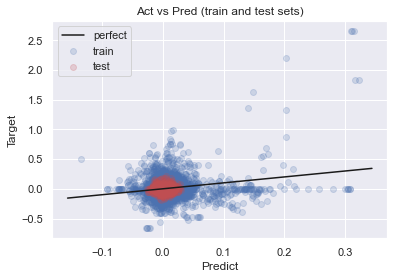

In [74]:
import numpy as np 

# Scatter the predictions vs the targets with 20% opacity
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k', label='perfect predict')

# Set the axis labels and show the plot
plt.xlabel('Predict')
plt.ylabel('Target')
plt.title('Act vs Pred (train and test sets)')
plt.legend()  # show the legend
plt.show()

print('is Test pred on perfect line?')


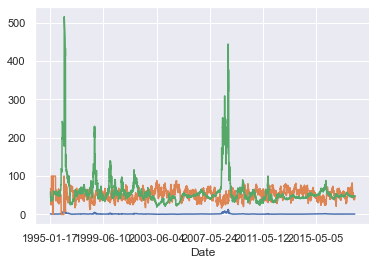

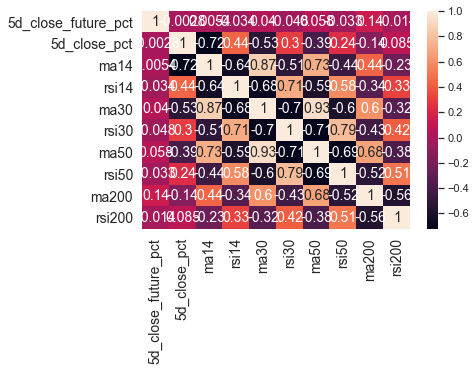

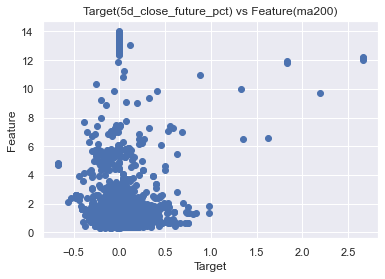

(5738, 10) (4877, 10) (861, 10)
                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.040
Model:                             OLS   Adj. R-squared:                  0.038
Method:                  Least Squares   F-statistic:                     22.46
Date:                 Sat, 31 Oct 2020   Prob (F-statistic):           7.95e-38
Time:                         16:06:52   Log-Likelihood:                 2245.0
No. Observations:                 4877   AIC:                            -4470.
Df Residuals:                     4867   BIC:                            -4405.
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const 

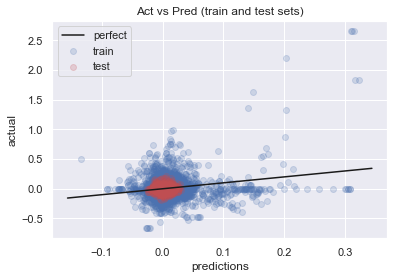

In [75]:
# EDA improvement
# Linear model cannot discover nonlinear rel btw feats and target unlink non-lin models 
# non-lin models ex. NN and Tree(Single,Bag(RF),Boost(GB/Ada))
# Linear models need to MANUALLY add more feature interactions ex. multiply feats

# feature_names = feature_names + ['SMAxRSI']
lng_df['SMAxRSI'] = lng_df['ma200'] * lng_df['rsi200']
lng_df['ma200'].plot()
lng_df['rsi30'].plot()
lng_df['SMAxRSI'].plot()
plt.show()

lng_df = lng_df.dropna()
features = lng_df[feature_names]
feature_and_target_cols = ['5d_close_future_pct'] + feature_names
feat_targ_df = lng_df[feature_and_target_cols]
corr = feat_targ_df.corr()

sns.heatmap(corr, annot=True, annot_kws = {"size": 14})
plt.yticks(rotation=0, size = 14); plt.xticks(rotation=90, size = 14)  # fix ticklabel directions and size
# plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area
maxcorrfeat=dfcorrmax(corr, '5d_close_future_pct', True)
# Create a scatter plot of the most highly correlated variable with the target
plt.scatter(lng_df['5d_close_future_pct'], lng_df[maxcorrfeat])
plt.xlabel('Target')
plt.ylabel('Feature')
plt.title('Target({}) vs Feature({})'.format('5d_close_future_pct',maxcorrfeat))
plt.show()

linear_features = sm.add_constant(features)
train_size = int(0.85 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)

model = sm.OLS(train_targets, train_features) # Ordinary Least Squares model
results = model.fit()  # fit the model
print(results)
print(results.summary())
print('PVALUES:::::::::::::::::::::\n',results.pvalues) # pd.Series
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.2, color='r', label='test')
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k', label='perfect predict')
plt.xlabel('predict')
plt.ylabel('act target')
plt.title('Act vs Pred (train and test sets)')
plt.legend()  # show the legend
plt.show()


print('is Test pred on perfect line?')


# 2- Machine learning tree methods
Tree Mod

In [76]:
### Tree(Single,Bag(RF),Boost(GB/Ada))

# SINGLE Tree (more Feat Eng):::
# VOL is unrelated but combining it with other ferats helps
# use VOL pct chg and its chg MA

# DATETIME also weak feat but can combine with other feats
# use dayofweek, dayof month, month, quarter, also num days after events such as devident release
# for hourly data use hour, min, seconds as for new feats

# IMP: use pd.DUMMIES func coz ex days are cat not ordinal(no relation btw days)


# BAGGING (RandomForest) less Var/Overfitting:::
# IMP: RANDOMFOREST is best common practice for any data scientist
# common practice: maxdepth 2-5, estimators 100+ but performance flattens after few hundreds
# R^2 score calc by model.score(trainfeats,traintargets) and model.score(testfeats,testtargets)
# HYPAR tune in SK using ParameterGrid()+setparams() or GridSearchCV+TimeSeriesSplit 

# Feat Selection:::
# Tree Models: Feat Importance (each feat contrib lvl to pred): each feat level of var reduction via data split
# ex. weak predictors dont reduce var much, so low feat imp, can drop them


# BOOSTING (GB/Ada) less Bias/Underfitting:::
# seq of fitting WEAK models on prev WEAK model res errors
# WEAK model = high bias/Underfitting
# HYPAR tune in SK using ParameterGrid()+setparams() or GridSearchCV+TimeSeriesSplit 


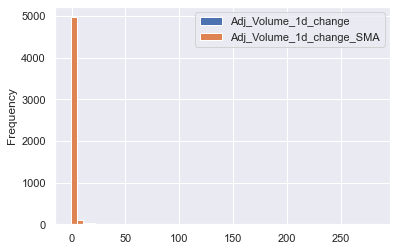

In [77]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']
feature_names.extend(new_features)
lng_df['Adj_Volume_1d_change'] = lng_df['Adj_Volume'].pct_change()
lng_df['Adj_Volume_1d_change_SMA'] = talib_SMA(lng_df['Adj_Volume_1d_change'].values,
                        timeperiod=5)
lng_df = lng_df.dropna()

# Plot histogram of volume % change data
lng_df[new_features].plot(kind='hist', sharex=False, bins=50)
plt.show()

Example:
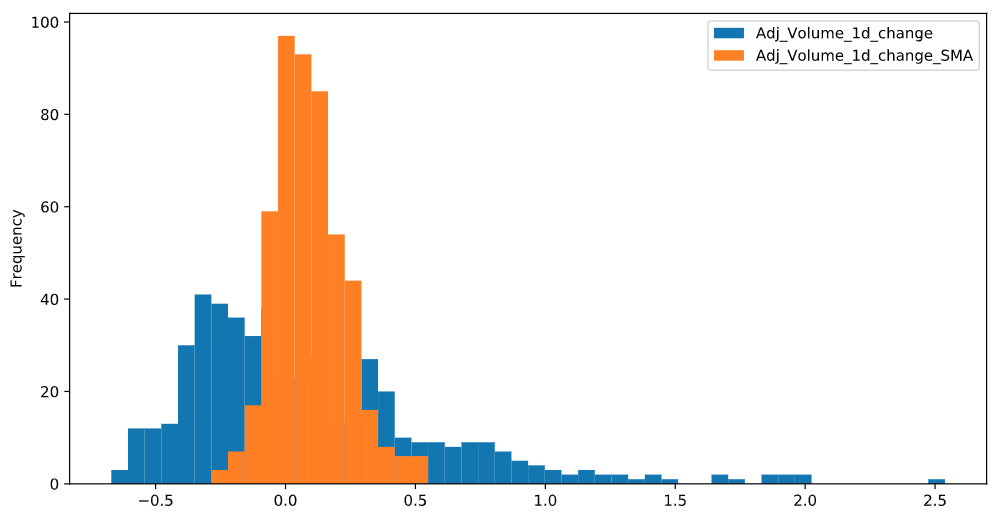

In [78]:
# tmp = lng_df.set_index(.index.to_series()
# type(tmp.T.squeeze())
# tmp.T.squeeze()
# # tmp.T.squeeze().dt.dayofweek

In [79]:
# s = pd.date_range('1996-09-04', '2018-04-09', freq='D').to_series()
# type(s)
# s
# s.dt.dayofweek

In [81]:
# # uncoment this


# # Use pandas' get_dummies function to get dummies for day of the week
# days_of_week = pd.get_dummies(lng_df.index.dayofweek,
#                               prefix='weekday',
#                               drop_first=True)

# # Set the index as the original dataframe index for merging
# days_of_week.index = lng_df.index

# # Join the dataframe with the days of week dataframe
# lng_df = pd.concat([lng_df, days_of_week], axis=1)

# # Add days of week to feature names
# feature_names.extend(['weekday_' + str(i) for i in range(1, 5)])
# lng_df.dropna(inplace=True)  # drop missing values in-place
# print(lng_df.head())

In [83]:
# # uncoment this


# # Add the weekday labels to the new_features list
# new_features.extend(['weekday_' + str(i) for i in range(1, 5)])

# # Plot the correlations between the new features and the targets
# sns.heatmap(lng_df[new_features + ['5d_close_future_pct']].corr(), annot=True)
# plt.yticks(rotation=0)  # ensure y-axis ticklabels are horizontal
# plt.xticks(rotation=90)  # ensure x-axis ticklabels are vertical
# plt.tight_layout()
# plt.show()

In [84]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(train_features,train_targets)

# Check the score on train and test
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features,test_targets))

1.0
-5.063018773044227


In [85]:
# Loop through a few different max depths and check the performance
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d)
    decision_tree.fit(train_features, train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')

max_depth= 3
0.30632609846334413
-0.057376441999286376 

max_depth= 5
0.38013100923028975
-0.1357733443871596 

max_depth= 10
0.5028630705874442
-1.0332846393128836 



max_depth= 3
0.30632609846334413
-0.057376441999286376 



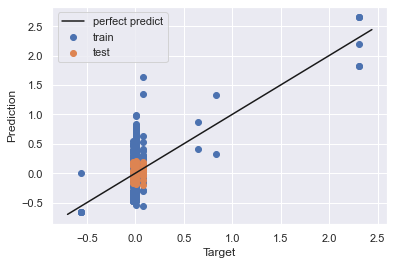

is Test pred on perfect line?


In [166]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(train_features, train_targets)

# Print out the scores on train and test
print('max_depth=', str(3))
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets), '\n')

# Predict values for train and test
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k', label='perfect predict')
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.legend()
plt.show()


print('is Test pred on perfect line?')


Example: OVERFITTING on train and UNDERFITTING on test sets
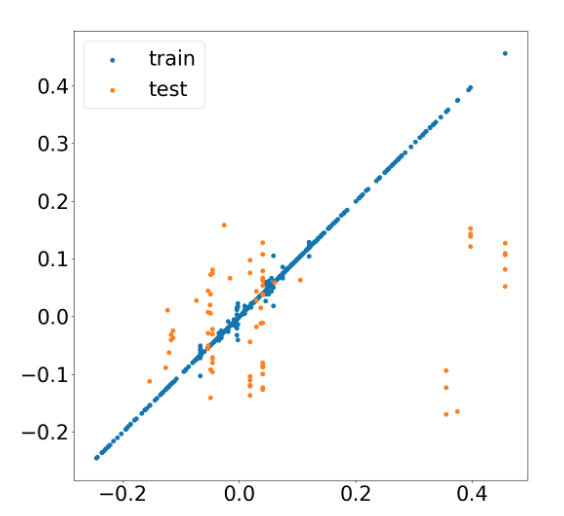

Example: Polynomial regression prediction has HIGH VARIANCE coz follows most possible data points
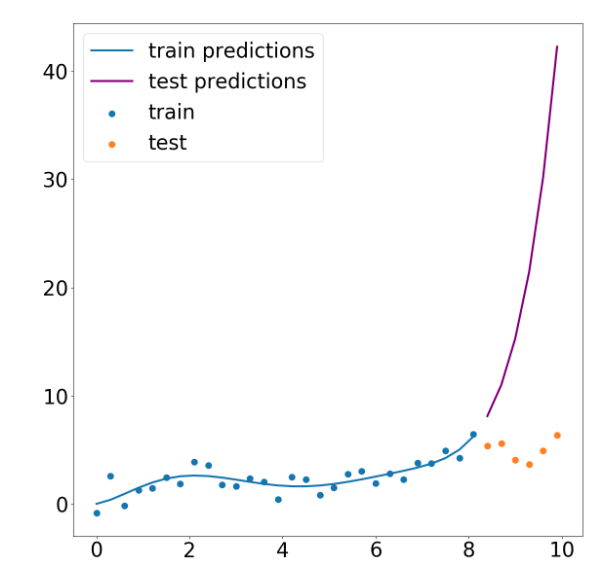

Example: Simple Regression Line has HIGH BIAS coz most data points are not covered
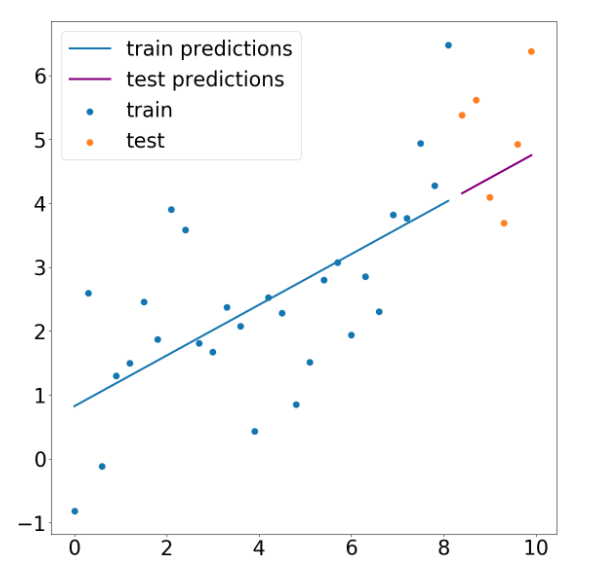

Solution: to overcome OVER/UNDERFITTING (Variance/Bias) use BAGGING (ex. RandomForest) to split data among many models
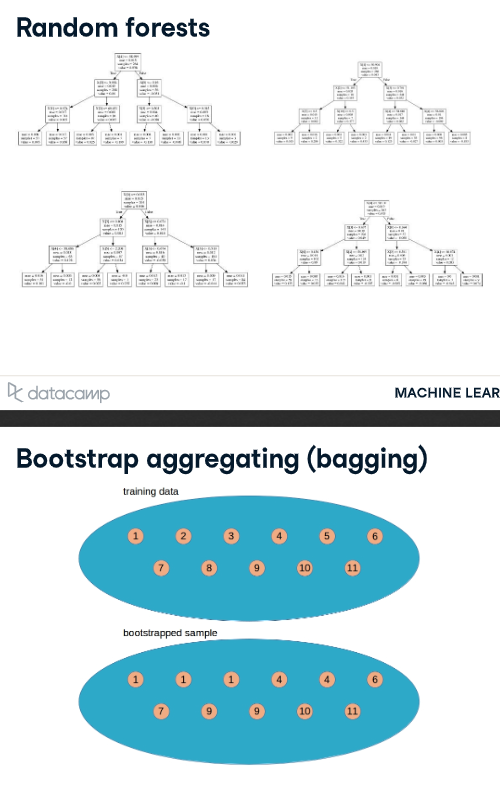

In [87]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))


0.9360826331147954
-0.35165378041837103


In [88]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators': [200], 'max_depth': [3], 'max_features': [4,8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

-0.03405753661134292 {'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}


{'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}
0.2905540096434793
-0.03405753661134292


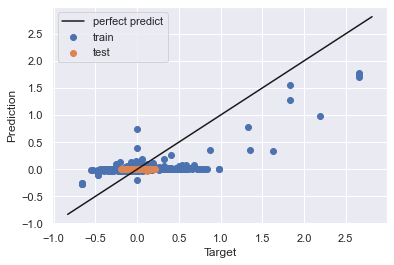

is Test pred on perfect line?


In [167]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

print(ParameterGrid(grid)[best_idx])
# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k', label='perfect predict')
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.legend()
plt.show()


print('is Test pred on perfect line?')


Example: previous single Tree model
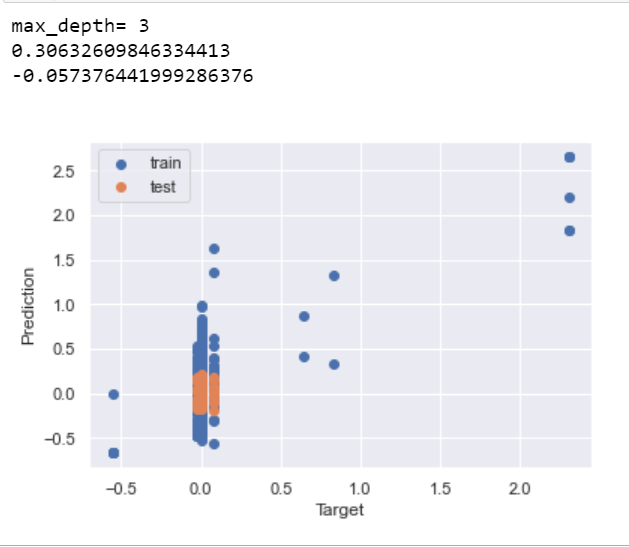

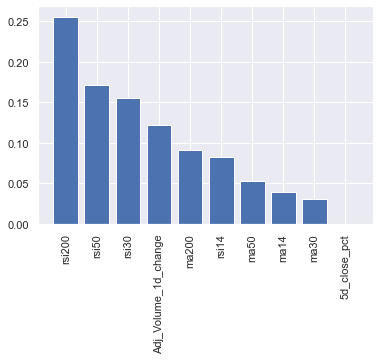

In [90]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features,train_targets)

print(gbr.score(train_features, train_targets))
print(gbr.score(test_features, test_targets))


0.3210257483208341
-0.04179441872825551


In [93]:
# # uncoment this


# # Extract feature importances from the fitted gradient boosting model
# feature_importances = gbr.feature_importances_

# # Get the indices of the largest to smallest feature importances
# sorted_index = np.argsort(feature_importances)[::-1]
# x = range(features.shape[1])

# # Create tick labels 
# labels = np.array(feature_names)[sorted_index]

# plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# # Set the tick lables to be the feature names, according to the sorted feature_idx
# plt.xticks(rotation=90)
# plt.show()

# 3- Neural networks and KNN
NN n KNN Mods

In [144]:
# Feat Selection:::
# drop weak feats based on feat importance of Tree model ex. weekdays

# NN and KNN:::
# work best(mostly) with data SCALING(Standard/minmax/medianMad/funcMap(ex. sig/tanh))

# KNN: 
# good practice to bias knn model towards high impotance feats (from random forest)
# KNN HYPAR: use n_neighbors as HYPAR to find best N with high R^2 score

# NN:
# better res coz of nonlin, feat interactions, customised
# 1st frwrd propagation (inp feats * weights + bias) then make nonlin (activfunc ex. ReLU)
# 2nd bk propogation ( RegErr(MSE) of frwrd predict loss ) send bk to updt weights n biases
# bk propogation = learning (take derivative of frwrd wieghts n biases)

# frontend(layers and nodes) = Keras, bkend(custom MSE loss func with penalty) = Theano/TenserFlow 
# Keras API: sequential(linear layers) , functional(layers graphs)
# Keras layers: Dense multi nodes with ReLU func, 
# keras last leyer: Dense only 1 node with Linear func (lin coz regression problem)
# Keras HYPAR: optimizer=adam, loss=mse, epochs=num training cycles
# TF MSE loss func with penalty: 
# tfmse: using tf.square, tf.reduceMean
# keras.losses.mse = tfmse, krmod.comp(...,loss=tfmse)
# tfmsepenalty: using tf.where, tf.square, tf.reduceMean
# keras.losses.signpenalty = tfmsepenalty, krmod.comp(...,loss=tfmsepenalty)

# NN Overfitting (DropOut/Ensembling):::
# Overfitting: Overfit on train set underfit on test set
# NN Overfit DropOut: HYPAR tunning to dec complixity via 
# Node Dec, DropOut, L1L2 Reglztn, autoEncoder, early stop, noise, maxnorm, ensemble
# Keras Droupout Layer: model.add(Dropout(0.5)) drop half nodes on training (small nets 0.1-2)
# NN Overfit Ensembling: Bag(Simple Pred Avg), Stack(multi model preds to final model) 
# Simple Pred Avg: np.mean(mod1preds,mod2preds) then cal R^2 score sk.r2score(targets,avgpreds)




In [94]:
train_features

,const,5d_close_pct,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200
Date,,,,,,,,,,
1995-01-17,1.0,0.000000,1.088235,0.000000,0.994118,66.666667,0.925882,66.666667,1.425588,41.340782
1995-01-18,1.0,0.000000,1.075630,0.000000,1.000000,66.666667,0.929412,66.666667,1.416471,41.340782
1995-01-19,1.0,0.000000,1.063025,0.000000,1.005882,66.666667,0.932941,66.666667,1.400294,32.258065
1995-01-20,1.0,0.000000,1.050420,0.000000,1.011765,66.666667,0.936471,66.666667,1.384118,32.258065
1995-01-23,1.0,0.000000,1.037815,0.000000,1.017647,66.666667,0.940000,66.666667,1.367941,32.258065
...,...,...,...,...,...,...,...,...,...,...
2014-10-29,1.0,0.056312,0.933626,62.820513,0.997055,41.162707,1.031709,49.659508,0.854185,56.832720
2014-10-30,1.0,0.027159,0.948145,59.796348,1.001948,40.456247,1.041483,49.285157,0.864409,56.722770
2014-10-31,1.0,0.028807,0.943105,72.367379,0.981178,41.973361,1.024064,49.852204,0.851902,56.868794


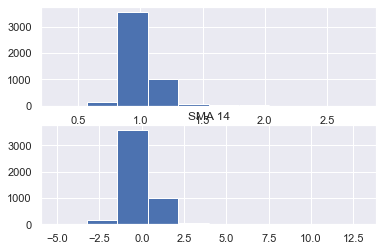

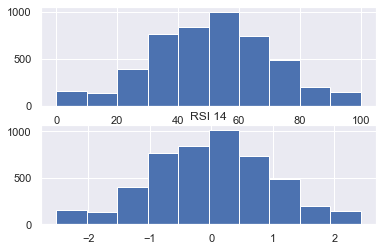

Scale is changed on X axis


In [95]:
from sklearn.preprocessing import scale

# Remove unimportant features (weekdays)- last for columns
# train_features = train_features.iloc[:, :-4]
# test_features = test_features.iloc[:, :-4]

# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.title('SMA 14')
plt.show()

f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 3].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 3])
plt.title('RSI 14')
plt.show()

print('Scale is changed on X axis')

n_neighbors = 2
train, test scores
0.846314491298026
-7.589938791978685

n_neighbors = 3
train, test scores
0.761899526708387
-4.633199718045214

n_neighbors = 4
train, test scores
0.6901464329040372
-3.704125189917911

n_neighbors = 5
train, test scores
0.6316709337533752
-3.084861728012423

n_neighbors = 6
train, test scores
0.5792810762839895
-2.6334988660170335

n_neighbors = 7
train, test scores
0.5364571623038357
-2.2883844521618144

n_neighbors = 8
train, test scores
0.4840181036781861
-1.9747422987401642

n_neighbors = 9
train, test scores
0.4406526180818464
-1.7789673582850458

n_neighbors = 10
train, test scores
0.4025084071747127
-1.6113722163697397

n_neighbors = 11
train, test scores
0.36524658726283055
-1.4515960287241096

n_neighbors = 12
train, test scores
0.3388543893119219
-1.3763424259807735

Best N = 12 based on TEST set scores


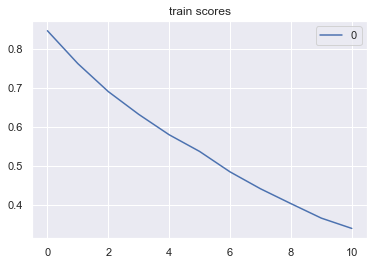

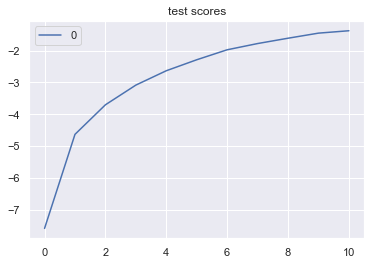

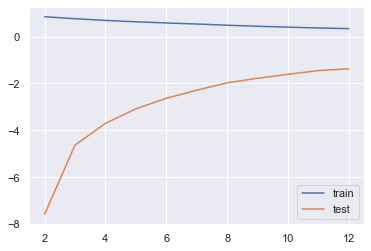

In [132]:
from sklearn.neighbors import KNeighborsRegressor

tmpidx, trainscores, testscores = [], [], []
for n in range(2,13):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    trainscores.append(knn.score(scaled_train_features, train_targets))
    testscores.append(knn.score(scaled_test_features, test_targets))
    tmpidx.append(n)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(trainscores[-1])
    print(testscores[-1])
    print()  # prints a blank line


import pandas as pd
pd.DataFrame(trainscores).plot(title='train scores')
pd.DataFrame(testscores).plot(title='test scores')
tmp = pd.DataFrame(trainscores, columns=['train'])
tmp['test'] = testscores
tmp.index = range(2,13)
tmp.plot()

bestN = tmpidx[np.argmax(testscores)]
print('Best N = {} based on TEST set scores'.format(bestN))

EXAMPLE: best N=5 based on TEST set scores
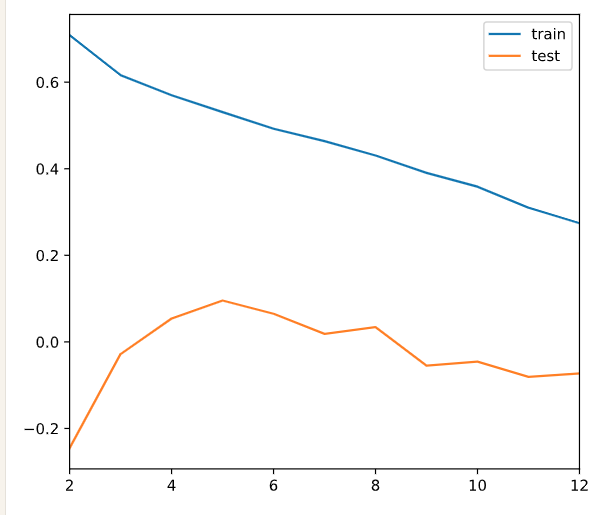

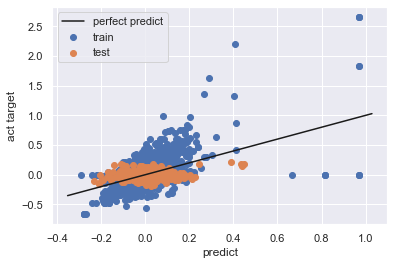

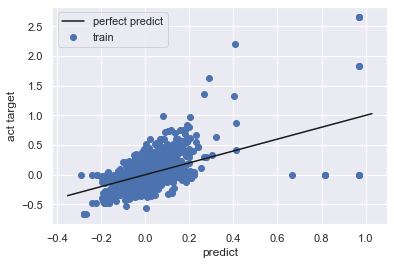

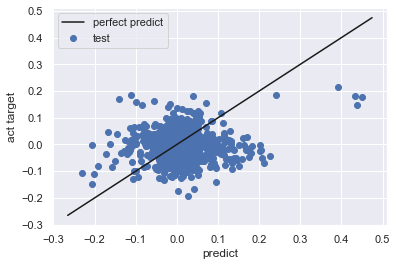

is Test pred on perfect line?


In [168]:
n= bestN

# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=n)

# Fit the model
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k', label='perfect predict')
plt.xlabel('predict')
plt.ylabel('act target')
plt.legend()
plt.show()


plt.scatter(train_predictions, train_targets, label='train')
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k', label='perfect predict')
plt.xlabel('predict')
plt.ylabel('act target')
plt.legend()
plt.show()


plt.scatter(test_predictions, test_targets, label='test')
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k', label='perfect predict')
plt.xlabel('predict')
plt.ylabel('act target')
plt.legend()
plt.show()

print('is Test pred on perfect line?')


EXAMPLE:
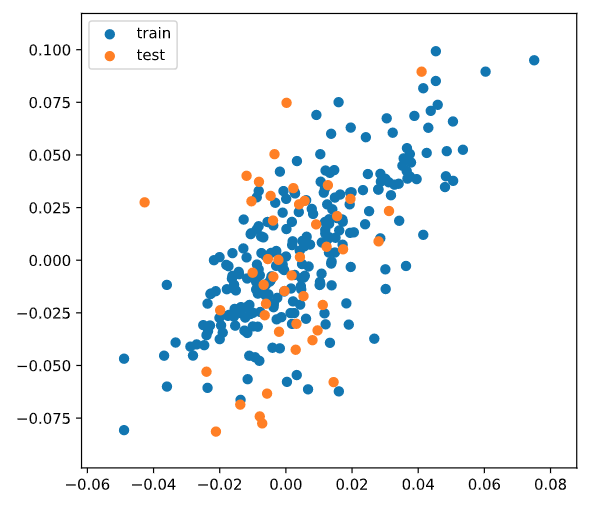

In [181]:
# !pip3 install keras
# Keras requires TensorFlow 2.2 or higher
# !pip install tensorflow # imp: not pip3


from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

Epoch 1/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0286
Epoch 2/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 3/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0222
Epoch 4/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0216
Epoch 5/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 6/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0210
Epoch 7/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 8/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 9/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 10/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 11/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 12/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 13/25
153/153 [====

In [157]:
# https://medium.com/@hanify/sequential-api-vs-functional-api-model-in-keras-266823d7cd5e#:~:text=Sequential%20and%20Functional%20are%20two,can%20do%20that%20for%20us.
# https://machinelearningmastery.com/keras-functional-api-deep-learning/
#

# from tensorflow.keras.utils import plot_model
# plot_model(model_1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# # ('Failed to import pydot. You must `pip install pydot` 
# # and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')

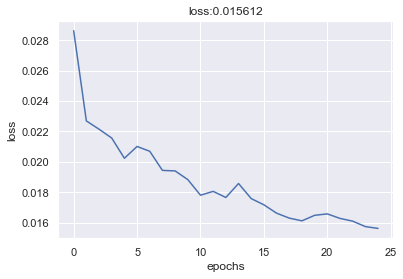

loss must be flattened out


In [182]:
# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
minloss = history.history['loss'][-1] # ????? use min func
plt.title('loss:' + str(round(minloss, 6)))
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


print('loss must be flattened out')

0.41132865732931
-3.749569212384144


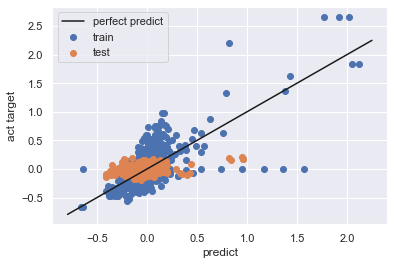

is Test pred on perfect line?
NN results not better than KNN?


In [183]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k', label='perfect predict')
plt.xlabel('predict')
plt.ylabel('act target')
plt.legend()
plt.show()


print('is Test pred on perfect line?')
print('NN results not better than KNN?')

Example: previous KNN results
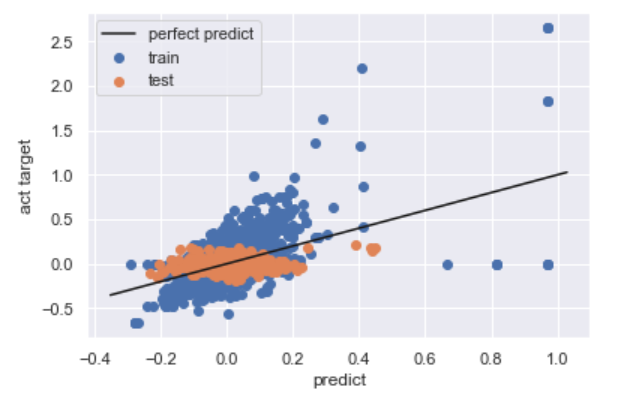

In [184]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)
print(keras.losses.mean_squared_error)

<function sign_penalty at 0x000000C84E06EE58>


Epoch 1/25
153/153 [==============================] - 0s 2ms/step - loss: 1.3288
Epoch 2/25
153/153 [==============================] - 0s 2ms/step - loss: 0.9432
Epoch 3/25
153/153 [==============================] - 0s 2ms/step - loss: 0.6527
Epoch 4/25
153/153 [==============================] - 0s 2ms/step - loss: 0.6874
Epoch 5/25
153/153 [==============================] - 0s 2ms/step - loss: 0.6519
Epoch 6/25
153/153 [==============================] - 0s 2ms/step - loss: 0.7468
Epoch 7/25
153/153 [==============================] - 0s 2ms/step - loss: 0.7500
Epoch 8/25
153/153 [==============================] - 0s 2ms/step - loss: 0.7211
Epoch 9/25
153/153 [==============================] - 0s 2ms/step - loss: 0.7963
Epoch 10/25
153/153 [==============================] - 0s 2ms/step - loss: 0.7384
Epoch 11/25
153/153 [==============================] - 0s 2ms/step - loss: 0.7560
Epoch 12/25
153/153 [==============================] - 0s 2ms/step - loss: 0.7726
Epoch 13/25
153/153 [====

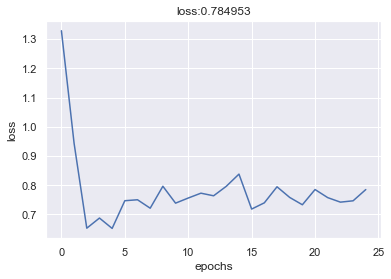

loss must be flattened out


In [186]:
# test below lines.......................................................
# keras.losses.mean_squared_error = tfmse, krmod.compil(...,loss=tfmse)
# keras.losses.sign_penalty = tfmsepenalty, krmod.compil(...,loss=tfmsepenalty)



# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
minloss = history.history['loss'][-1] # ????? use min func
plt.title('loss:' + str(round(minloss, 6)))
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


print('loss must be flattened out')

Example: previous simple MSE loss func without penalty
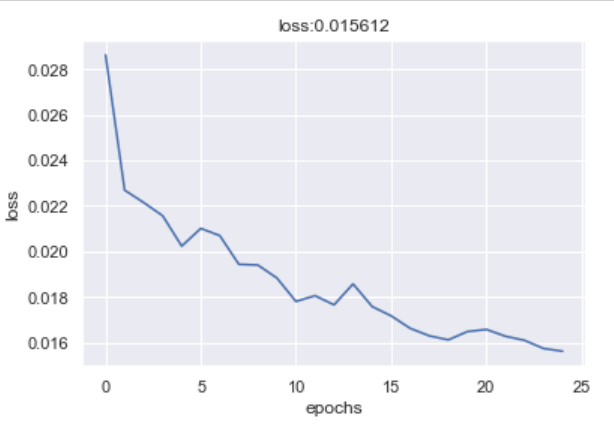

Example:
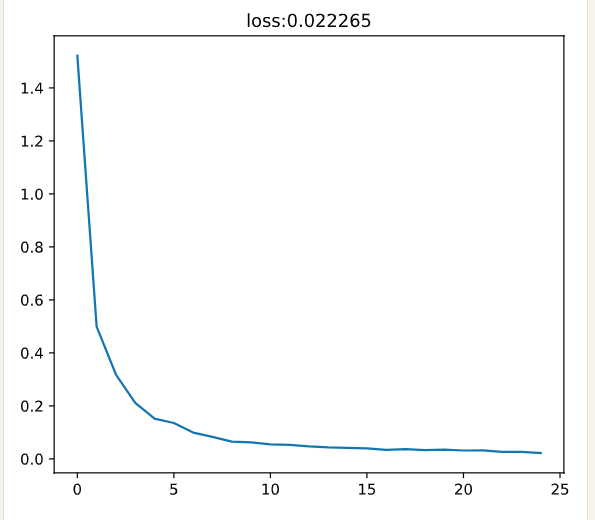

0.11331580952565046
0.045975211274077


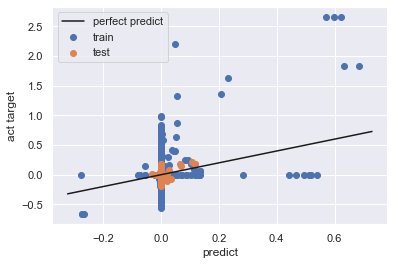

is Test pred on perfect line?
NN results not better than KNN?
using custom loss func avoiding opposit signed act-pred, train set actual vs predictions shape has changed to be a bow-tie


In [189]:
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k', label='perfect predict')
plt.xlabel('predict'); plt.ylabel('act target')
plt.legend(); plt.show()


print('is Test pred on perfect line?')
print('NN with custom loss func better?')
print('using custom loss func avoiding opposit signed act-pred, train set actual vs predictions shape has changed to be a bow-tie')



Example: previous NN without custom penalty loss func
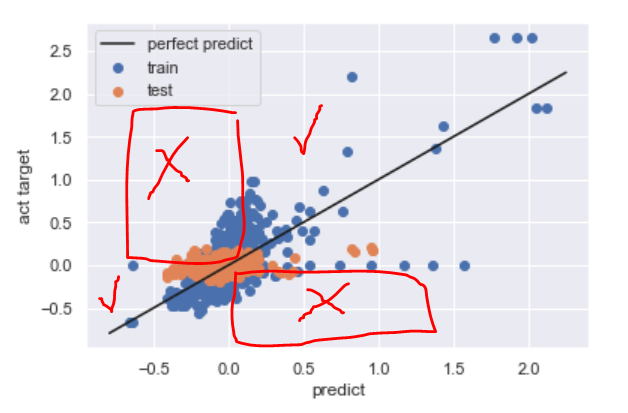

Example: previous KNN results
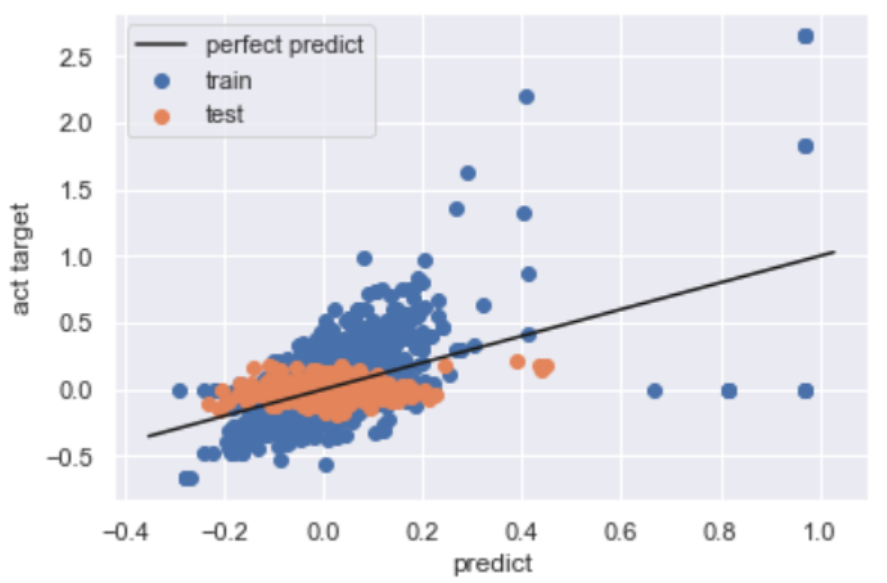

Example: with custom penalty loss func
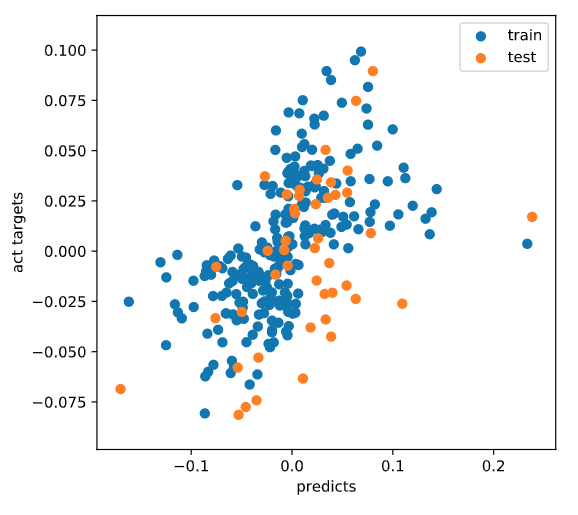

Epoch 1/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0376
Epoch 2/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0256
Epoch 3/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 4/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0239
Epoch 5/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 6/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0225
Epoch 7/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 8/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0211
Epoch 9/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0203
Epoch 10/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0214
Epoch 11/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0208
Epoch 12/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 13/25
153/153 [====

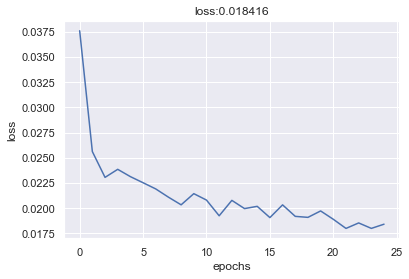

loss must be flattened out
Dropout helps the model generalized a bit better to unseen data


In [198]:
from keras.layers import Dropout

# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
minloss = history.history['loss'][-1] # ????? use min func
plt.title('loss:' + str(round(minloss, 6)))
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


print('loss must be flattened out')
print('Dropout helps the model generalized a bit better to unseen data')

Example: previous custom loss func with penalty
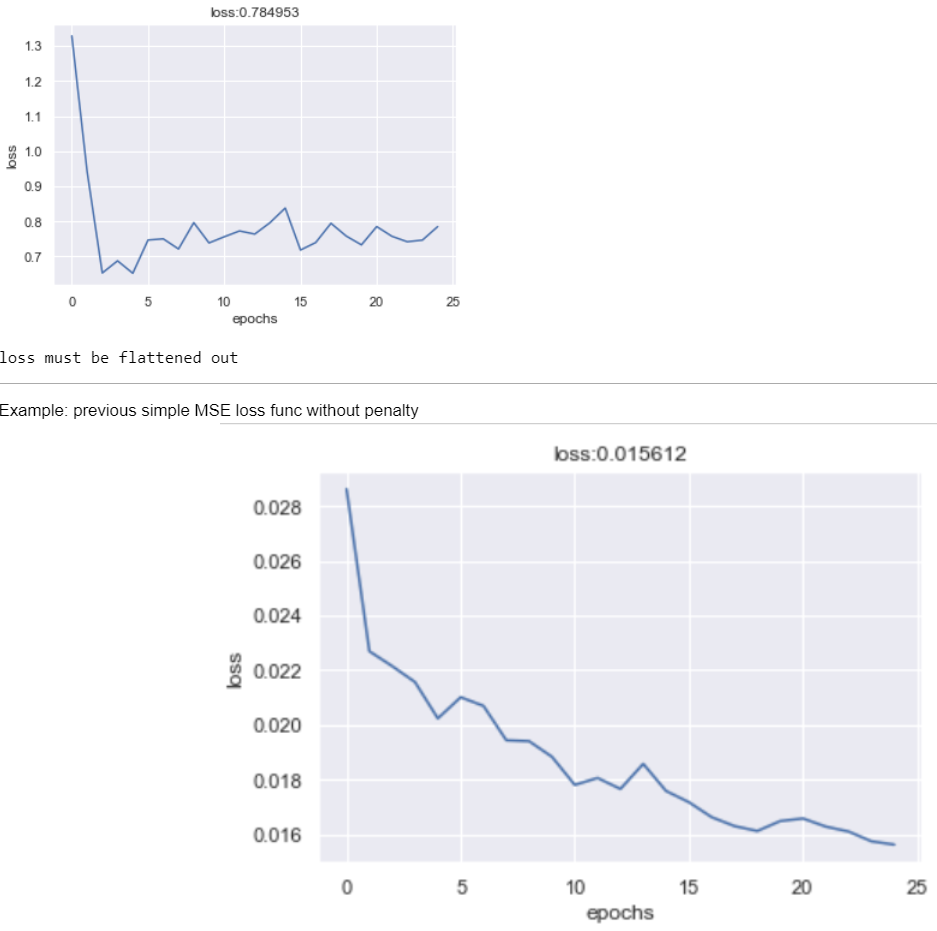

Example:
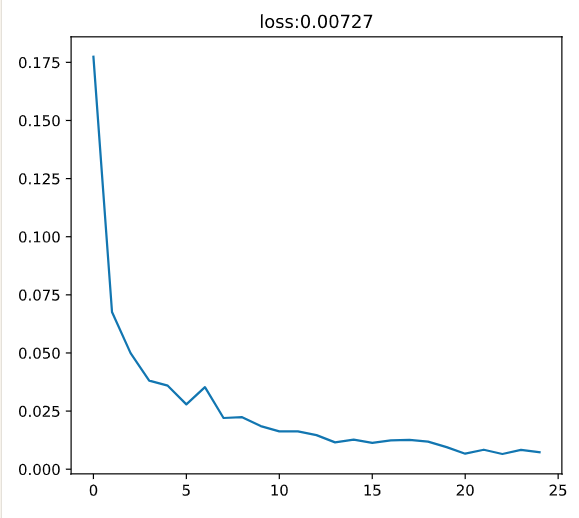

0.306433763268833
-0.9262039917774505


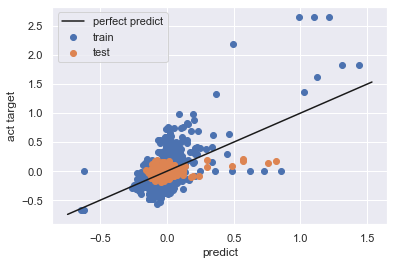

is Test pred on perfect line?
NN with dropout better?


In [205]:
# Evaluate R^2 scores
train_preds = model_3.predict(scaled_train_features)
test_preds = model_3.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual 
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k', label='perfect predict')
plt.xlabel('predict'); plt.ylabel('act target')
plt.legend(); plt.show()


print('is Test pred on perfect line?')
print('NN with dropout better?')



In [201]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1, test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

[ 0.00081577 -0.00062075 -0.02549916 -0.0262751  -0.00572802]


0.3365304921226666
-0.7194543198494907


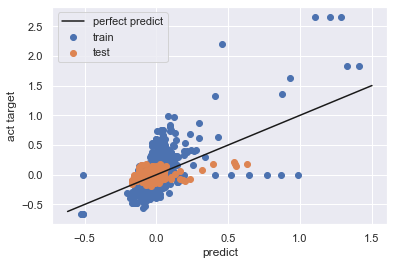

is Test pred on perfect line?
are R^2 values around the average of the 3 models we ensembled?
Notice the TRAIN plot also looks like the bow-tie shape has been softened a bit.


In [204]:
from sklearn.metrics import r2_score

# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k', label='perfect predict')
plt.xlabel('predict'); plt.ylabel('act target')
plt.legend(); plt.show()


print('is Test pred on perfect line?')
print('are R^2 values around the average of the 3 models we ensembled?')
print('Notice the TRAIN plot also looks like the bow-tie shape has been softened a bit.')


Example: prev NN simple
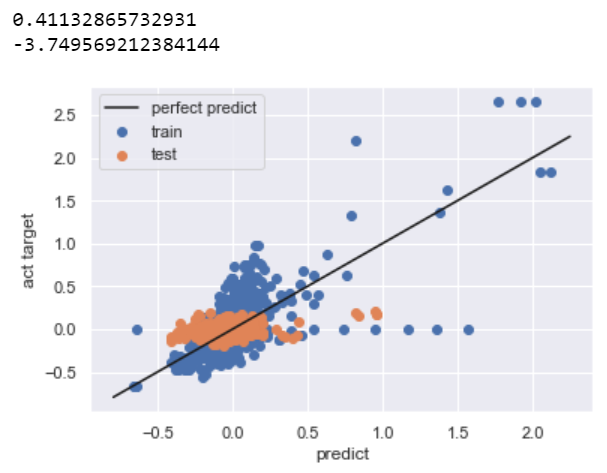


Example: prev NN with custom loss func
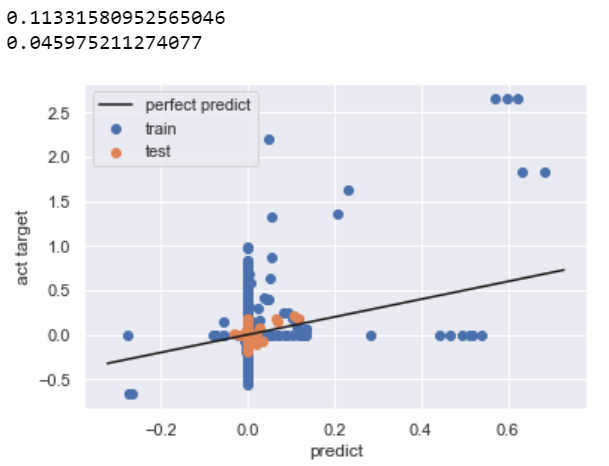


Example: prev NN with dropout
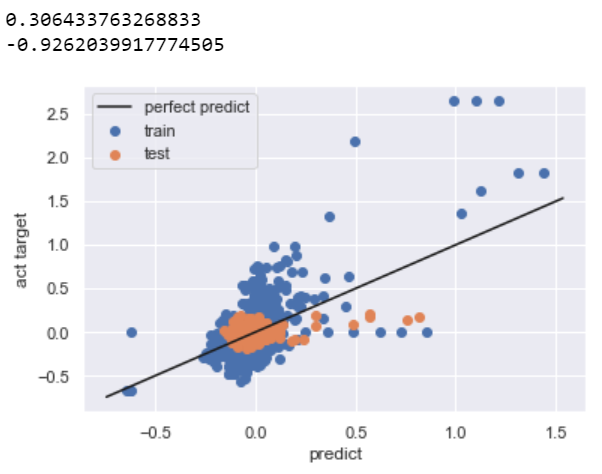


Example:
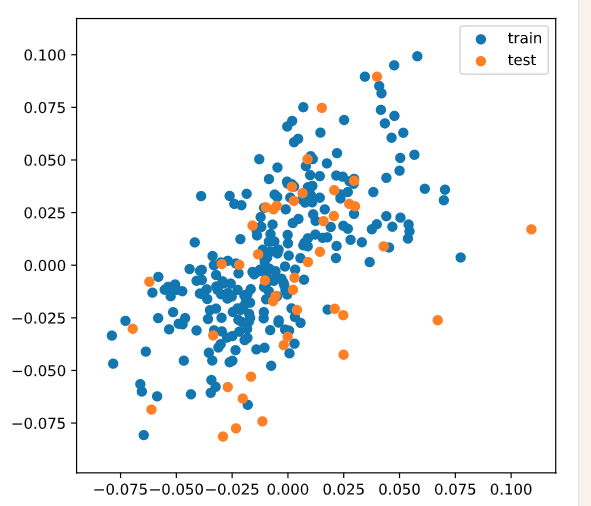

# 4- Machine learning with modern portfolio theory
MPT

In [ ]:
import pandas as pd

stocks = ['LNG','SPY','SMLV']

import pandas as pd
lng_df = pd.read_csv('lng.csv', index_col=0, header=0, names=['Date','LNG','LNGVOL']).drop('LNGVOL',axis=1)
spy_df = pd.read_csv('spy.csv', index_col=0, header=0, names=['Date','SPY','SPYVOL']).drop('SPYVOL',axis=1)
smlv_df = pd.read_csv('smlv.csv', index_col=0, header=0, names=['Date','SMLV','SMLVVOL']).drop('SMLVVOL',axis=1)

print(lng_df.head())
print('')
print(spy_df.head())
print('')
print(smlv_df.head())
print('')

# Join 3 stock dataframes together
full_df = pd.concat([lng_df, spy_df, smlv_df], axis=1).dropna()
full_df.index = pd.to_datetime(full_df.index)
full_df.index.names = ['Date']

print(full_df.tail())
print('')


# Resample the full dataframe to monthly timeframe
monthly_df = full_df.resample('BMS').first()

# Calculate daily returns of stocks
returns_daily = full_df.pct_change()

# Calculate monthly returns of the stocks
returns_monthly = monthly_df.pct_change().dropna()

print(returns_monthly.tail())
print('')



full_df.plot()
returns_daily.plot()
monthly_df.plot()
returns_monthly.plot()

In [ ]:
# Daily covariance of stocks (for each monthly period)
covariances = {}
rtd_idx = returns_daily.index
for i in returns_monthly.index:
    # Mask daily returns for each month and year, and calculate covariance
    mask = (rtd_idx.month == i.month) & (rtd_idx.year == i.year)
    
    # Use the mask to get daily returns for the current month and year of monthy returns index
    covariances[i] = returns_daily[mask].cov()

print(covariances[i])

dftmp = pd.DataFrame(covariances[i])
dftmp.plot(title=i, marker='.')

In [ ]:
# for idate in returns_monthly.index:
for idate in returns_monthly.index[-5:]:
    dftmp = pd.DataFrame(covariances[idate])
    dftmp.plot(title=idate, marker='.')

In [ ]:
cntportfos = 1000
cntstocks = returns_monthly.shape[1]
minreturnlimit, minreturn = False, 0.01 


import numpy as np

portfolio_returns, portfolio_volatility, portfolio_weights = {}, {}, {}

# Get portfolio performances at each month
for date in sorted(covariances.keys()):
#     print('======================================')
#     print('date\n',date)
    cov = covariances[date]
#     print('cov\n',cov)
    for portfolio in range(cntportfos):
#         print('--------------------------------------')
#         print('portfolio\n',portfolio)
        
        weights = np.random.random(cntstocks)
#         print('weights\n',weights)
        weights /= np.sum(weights) # /= divides weights by their sum to normalize
#         print('weights\n',weights)
        
#         print('returns_monthly.loc[date]\n',returns_monthly.loc[date])
        returns = np.dot(weights, returns_monthly.loc[date])
        if minreturnlimit and returns<minreturn: continue
#         print('returns\n',returns)
        
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
#         print('volatility\n',volatility)
        
#         print('portfolio_returns\n',portfolio_returns)
        portfolio_returns.setdefault(date, []).append(returns)
#         print('portfolio_returns\n',portfolio_returns)
        
#         print('portfolio_volatility\n',portfolio_volatility)
        portfolio_volatility.setdefault(date, []).append(volatility)
#         print('portfolio_volatility\n',portfolio_volatility)
        
#         print('portfolio_weights\n',portfolio_weights)
        portfolio_weights.setdefault(date, []).append(weights)
#         print('portfolio_weights\n',portfolio_weights)


print(portfolio_weights[date][0])

In [ ]:
from matplotlib import pyplot as plt

# Get latest date of available data
date = sorted(covariances.keys())[-1] 

# print('portfolio_volatility[date]',portfolio_volatility[date])r
# print('portfolio_returns[date]',portfolio_returns[date])

# Plot efficient frontier
# warning: this can take at least 10s for the plot to execute...
plt.scatter(x=portfolio_volatility[date], y=portfolio_returns[date],  alpha=0.1)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

In [ ]:
# Empty dictionaries for sharpe ratios and best sharpe indexes by date
sharpe_ratio, max_sharpe_idxs = {}, {}

# Loop through dates and get sharpe ratio for each portfolio
for date in portfolio_returns.keys():
    for i, ret in enumerate(portfolio_returns[date]):
    
        # Divide returns by the volatility for the date and index, i
        sharpe_ratio.setdefault(date, []).append(ret / portfolio_volatility[date][i])

    # Get the index of the best sharpe ratio for each date
    max_sharpe_idxs[date] = np.argmax(sharpe_ratio[date])

print(portfolio_returns[date][max_sharpe_idxs[date]])

In [ ]:
# Calculate exponentially-weighted moving average of daily returns
ewma_daily = returns_daily.ewm(span=30).mean()

# Resample daily returns to first business day of the month with the first day for that month
ewma_monthly = ewma_daily.resample('BMS').first()

# Shift ewma for the month by 1 month forward so we can use it as a feature for future predictions 
ewma_monthly = ewma_monthly.shift(1).dropna()

print(ewma_monthly.iloc[-1])

In [ ]:
targets, features = [], []

# Create features from price history and targets as ideal portfolio
for date, ewma in ewma_monthly.iterrows():

    # Get the index of the best sharpe ratio
    best_idx = max_sharpe_idxs[date]
    targets.append(portfolio_weights[date][best_idx])
    features.append(ewma)  # add ewma to features

targets = np.array(targets)
features = np.array(features)
print(targets[-5:])

In [ ]:
print('Target= Optimised Portfo Weights each Month\n',pd.DataFrame(targets, columns=stocks))
print('')
print('Features= Price EMA(30D) each Month\n',pd.DataFrame(features, columns=stocks))

In [ ]:
# Get most recent (current) returns and volatility
date = sorted(covariances.keys())[-1]
cur_returns = portfolio_returns[date]
cur_volatility = portfolio_volatility[date]

# Plot efficient frontier with sharpe as point
plt.scatter(x=cur_volatility, y=cur_returns, alpha=0.1, color='blue')
best_idx = max_sharpe_idxs[date]

# Place an orange "X" on the point with the best Sharpe ratio
plt.scatter(x=cur_volatility[best_idx], y=cur_returns[best_idx], marker='x', color='orange')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

print('cur_returns[best_idx]',cur_returns[best_idx])
print('cur_volatility[best_idx]',cur_volatility[best_idx])

print('date',date)
print('best_idx',best_idx)

print('portfolio_weights[date][best_idx]',portfolio_weights[date][best_idx])

In [ ]:
# IMP (RandomForest)::::::::::::::::::: 
# 1- best model most times, 
# 2- TRAIN score improvment stops after n_estim=100 but TEST score still improves
cnttrees=300

# Make train and test features
train_size = int(0.85 * features.shape[0])
train_features = features[:train_size]
test_features = features[train_size:]
train_targets = targets[:train_size]
test_targets = targets[train_size:]

# Fit the model and check scores on train and test
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=cnttrees, random_state=42)
rfr.fit(train_features, train_targets)
print('TRAIN Score:', rfr.score(train_features, train_targets))
print('TEST Score:', rfr.score(test_features, test_targets))

In [ ]:
print('TRAIN----------Target= Optimised Portfo Weights each Month\n',pd.DataFrame(train_targets, columns=stocks))
print('')
print('TRAIN----------Features= Price EMA(30D) each Month\n',pd.DataFrame(train_features, columns=stocks))
print('')
print('TEST----------Target= Optimised Portfo Weights each Month\n',pd.DataFrame(test_targets, columns=stocks))
print('')
print('TEST----------Features= Price EMA(30D) each Month\n',pd.DataFrame(test_features, columns=stocks))

In [ ]:
# Get predictions from model on train and test
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features) 

# Calculate and plot returns from our RF predictions and the SPY returns
test_returns = np.sum(returns_monthly.iloc[train_size:] * test_predictions, axis=1)
plt.plot(test_returns, label='Portfo (Ret pred of TEST)')
plt.plot(returns_monthly['SPY'].iloc[train_size:], label='SPY (Ret of TEST set)')
plt.legend()
plt.show()

In [ ]:
# Calculate the effect of our portfolio selection on a hypothetical $1k investment
cash = 1000
algo_cash, spy_cash = [cash], [cash]  # set equal starting cash amounts
for r in test_returns:
    cash *= 1 + r
    algo_cash.append(cash)

# Calculate performance for SPY
cash = 1000  # reset cash amount
for r in returns_monthly['SPY'].iloc[train_size:]:
    cash *= 1 + r
    spy_cash.append(cash)

print('algo returns:', (algo_cash[-1] - algo_cash[0]) / algo_cash[0])
print('SPY returns:', (spy_cash[-1] - spy_cash[0]) / spy_cash[0])


# Plot the algo_cash and spy_cash to compare overall returns
plt.plot(algo_cash, label='Portfo (Invest pred of TEST)')
plt.plot(spy_cash, label='SPY (Invest of TEST set)')
plt.legend()  # show the legend
plt.show()



# IMP: Portfo MODEL is compared with S&P MARKET-INDEX but not much better, need to add MORE FEATURES
print('IMP: Portfo MODEL is compared with S&P MARKET-INDEX but not much better, need to add MORE FEATURES')

# IMP: Real-world big data use: 
# Parallel processing LIBS (Python multiprocess, Dask, Spark)
# Cloud (AWS, ...)
# Big Datasets from quandl.com/EOD
# Use Alternative Data coz price is not enough for prediction:
# - Sattelite imgs for shipping vol, 
# - PsychSignal social media sentiment analysis,
# - expert analyst preds
# - fundamentals data
# - dont forget to test on TEST data
# - use model to invest only on low-cost ETFs not stocks
